# Image Classification

In [1]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
path = Path('../dataset/13321_2017_226_MOESM1_ESM/')
df = pd.read_csv(path/'CHEMBL205_cl.csv')

# Generate images

In [4]:
DATA = path/'mol_images'
DATA.mkdir(exist_ok=True)

In [5]:
df.head()

,CID,SMILES,Activity
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc...,1
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O...,1
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,1


In [6]:
# Iterate all rows in the dataframe and create images
#for i, r in df.iterrows():
    
#    cid = r.CID
#    smile = r.SMILES
#    mol = Chem.MolFromSmiles(smile)
#    Chem.Draw.MolToFile(mol, DATA/f'{cid}.png', size = (300, 300), imageType='png')

In [7]:
images = list(DATA.glob('*.png'))

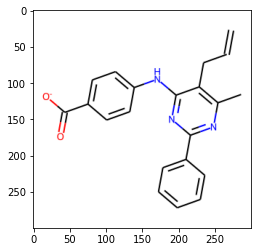

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(images[0])
imgplot = plt.imshow(img)
plt.show()

# Create train validation split

In [9]:
from sklearn.model_selection import train_test_split

# Create dataloader

In [14]:
from fastai.vision.all import *

In [15]:
df['Image'] = df['CID'] + '.png'
df.head()

,CID,SMILES,Activity,Image
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc2)C=2c3c(OC4=CC(=O)C=CC=24)cc(O)cc3)ccc1,1,CHEMBL188002.png
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1,CHEMBL364127.png
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O)C2(C)C,1,CHEMBL1683469.png
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1,CHEMBL52564.png
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,1,CHEMBL21427.png


In [16]:
images = df['CID'] + ".png"
images.head()

0     CHEMBL188002.png
1     CHEMBL364127.png
2    CHEMBL1683469.png
3      CHEMBL52564.png
4      CHEMBL21427.png
Name: CID, dtype: object

In [17]:
db = DataBlock(
    blocks = (ImageBlock(), CategoryBlock()), 
    get_x=ColReader('Image', pref=DATA),
    get_y=ColReader('Activity'), 
    item_tfms=None, 
    batch_tfms=None
    )

In [18]:
dls = db.dataloaders(df, bs=64, shuffle_train=True)

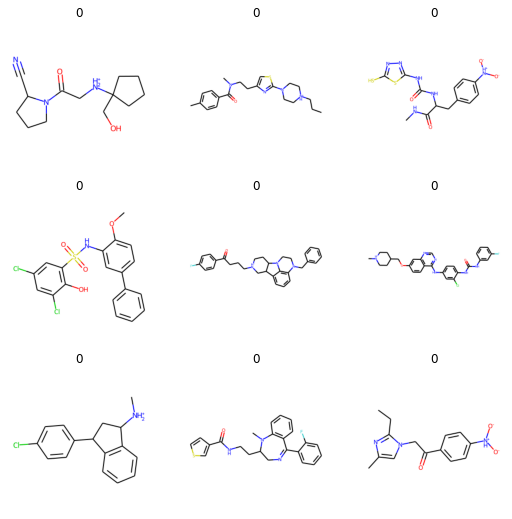

In [19]:
dls.show_batch()

# Train CNN model

In [20]:
from sklearn.metrics import auc,roc_auc_score,recall_score,precision_score,f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score

In [21]:
learn = cnn_learner(dls, arch=resnet18, pretrained=True, 
                    wd=2e-4, ps=0.8, 
                    metrics=[accuracy, 
                            F1Score(), 
                            Precision(), 
                            Recall(), 
                            RocAucBinary(), 
                            MatthewsCorrCoef()])

In [22]:
lr_min, lr_steep = learn.lr_find(suggestions=True, show_plot=False)

KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(2, slice(lr_min))